In [1]:
#Import Packages used in the following analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
#Pandas Data Frame using date derived from an Excel Spreadsheet
#Print to confirm the Sheet has been read correctly
spwgt = pd.ExcelFile('SP_Weightings1.xlsx')
print(spwgt.sheet_names)

['Index Weightings']


In [3]:
#Import the data from Index Weightings Tab (Index 0) using parse
spwgt1 = spwgt.parse(0)

In [4]:
#Confirmation of the Excel read and a print out of the Data Frame head
spwgt1['Weight'].sort_values()
spwgt1.info()
print(spwgt1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Symbol  505 non-null    object 
 1   Weight  505 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.0+ KB
  Symbol    Weight
0   AAPL  6.115734
1   MSFT  5.635407
2   AMZN  4.301124
3     FB  2.283107
4  GOOGL  2.060597


In [5]:
#Pandas Data Frame using date derived from an CSV File
#Confirmation of the CSV read with a print out of the Data Frame head
spcons = pd.read_csv('s_p_constituents.csv')
type(spcons)
print(spcons.head())
spcons.shape

  Symbol                 Name       Sector
0    MMM                   3M  Industrials
1    AOS          A. O. Smith  Industrials
2    ABT  Abbott Laboratories  Health Care
3   ABBV               AbbVie  Health Care
4   ABMD              Abiomed  Health Care


(505, 3)

In [6]:
spcons.sort_values('Symbol', ascending = True, inplace = True)
print(spcons)

    Symbol                     Name                  Sector
13       A     Agilent Technologies             Health Care
30     AAL  American Airlines Group             Industrials
9      AAP       Advance Auto Parts  Consumer Discretionary
46    AAPL                    Apple  Information Technology
3     ABBV                   AbbVie             Health Care
..     ...                      ...                     ...
500    YUM              Yum! Brands  Consumer Discretionary
502    ZBH            Zimmer Biomet             Health Care
501   ZBRA       Zebra Technologies  Information Technology
503   ZION            Zions Bancorp              Financials
504    ZTS                   Zoetis             Health Care

[505 rows x 3 columns]


In [7]:
#S&P 500 Index constituents based on Industry Sectors
IndSect = spcons.groupby('Sector')['Name'].count()
print(IndSect)

Sector
Communication Services    26
Consumer Discretionary    63
Consumer Staples          32
Energy                    22
Financials                65
Health Care               64
Industrials               74
Information Technology    74
Materials                 28
Real Estate               29
Utilities                 28
Name: Name, dtype: int64


In [8]:
#Pandas Data Frame using date derived from an Excel Spreadsheet
#Print to confirm the Sheet has been read correctly
sp500 = pd.ExcelFile('SP_500_Daily_Returns_2020.xlsx')
print(sp500.sheet_names)

['Index Levels']


In [9]:
#Import the data from Sheet1 Tab using parse
sp500 = sp500.parse('Index Levels')

In [10]:
#Confirmation of the Excel read and a print out of the Data Frame head
sp500.info()
print(sp500.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          253 non-null    datetime64[ns]
 1   Open_Index    253 non-null    float64       
 2   High_Index    253 non-null    float64       
 3   Low_Index     253 non-null    float64       
 4   Close_Index   253 non-null    float64       
 5   Adj Close     253 non-null    float64       
 6   Volume_Index  253 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 14.0 KB
        Date  Open_Index  High_Index  Low_Index  Close_Index  Adj Close  \
0 2020-01-02     3244.67     3258.14    3235.53      3257.85    3257.85   
1 2020-01-03     3226.36     3246.15    3222.34      3234.85    3234.85   
2 2020-01-06     3217.55     3246.84    3214.64      3246.28    3246.28   
3 2020-01-07     3241.86     3244.91    3232.43      3237.18    3237.18   
4

In [11]:
#Step to drop the Adjusted Close price from the Data Frame as it is not required in the analysis
sp500.drop('Adj Close', axis = 1, inplace=True)

In [12]:
#Calculation to enrich the dataset with the daily movement
sp500['S&P 500 Movement'] = ((sp500['Close_Index'] / sp500['Close_Index'].shift(1))-1)*100
print(sp500.head())

        Date  Open_Index  High_Index  Low_Index  Close_Index  Volume_Index  \
0 2020-01-02     3244.67     3258.14    3235.53      3257.85    3458250000   
1 2020-01-03     3226.36     3246.15    3222.34      3234.85    3461290000   
2 2020-01-06     3217.55     3246.84    3214.64      3246.28    3674070000   
3 2020-01-07     3241.86     3244.91    3232.43      3237.18    3420380000   
4 2020-01-08     3238.59     3267.07    3236.67      3253.05    3720890000   

   S&P 500 Movement  
0               NaN  
1         -0.705987  
2          0.353339  
3         -0.280321  
4          0.490242  


In [13]:
#Setting Variables that will feed into a Web Call to Yahoo Finance to pull the daily price details for the Year 2020
#For the purposes of the exercise the user should enter Apple (AAPL) and Microsoft (MSFT) byt any S&P 500 ticker can be used
ticker1 = input('Enter Ticker 1 - ') # Enter AAPL
ticker2 = input('Enter Ticker 2 - ') # Enter MSFT
period1 = int(time.mktime(datetime.datetime(2020, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2020, 12, 31, 23, 59).timetuple()))
interval = '1d' # Defaulted to 1 day in this code but other frequencies are possible using '1w' for Weekly and '1m' for monthly

Enter Ticker 1 - AAPL
Enter Ticker 2 - INTC


In [14]:
# The variables set from the preceding steps are fed into the web address so that a dynamic read of the data is possible
Stock1 = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker1}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [15]:
# The variables set from the preceding steps are fed into the web address so that a dynamic read of the data is possible
Stock2 = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker2}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [16]:
#Pandas Data Frame using date derived from the Yahoo Finance Website
#Confirmation of the Web read with a print out of the Data Frame head
#Print out the Data Frame Info to verify the date type as this will be used in the merge operation to join the tables together
Stockperiod1 = pd.read_csv(Stock1)
Stockperiod1["Date"] = pd.to_datetime(Stockperiod1["Date"])
Stockperiod1["Symbol"] = ticker1
print(Stockperiod1.head())
Stockperiod1.info()
Stockperiod1.shape

        Date       Open       High        Low      Close  Adj Close  \
0 2020-01-02  74.059998  75.150002  73.797501  75.087502  74.207466   
1 2020-01-03  74.287498  75.144997  74.125000  74.357498  73.486023   
2 2020-01-06  73.447502  74.989998  73.187500  74.949997  74.071579   
3 2020-01-07  74.959999  75.224998  74.370003  74.597504  73.723213   
4 2020-01-08  74.290001  76.110001  74.290001  75.797501  74.909149   

      Volume Symbol  
0  135480400   AAPL  
1  146322800   AAPL  
2  118387200   AAPL  
3  108872000   AAPL  
4  132079200   AAPL  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj

(253, 8)

In [17]:
#Calculation to enrich the dataset with the daily movement
Stockperiod1['{} Movement'.format(ticker1)] = ((Stockperiod1['Close'.format(ticker1)] / Stockperiod1['Close'.format(ticker1)].shift(1))-1)*100
print(Stockperiod1.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2020-01-02  74.059998  75.150002  73.797501  75.087502  74.207466   
1 2020-01-03  74.287498  75.144997  74.125000  74.357498  73.486023   
2 2020-01-06  73.447502  74.989998  73.187500  74.949997  74.071579   
3 2020-01-07  74.959999  75.224998  74.370003  74.597504  73.723213   
4 2020-01-08  74.290001  76.110001  74.290001  75.797501  74.909149   

      Volume Symbol  AAPL Movement  
0  135480400   AAPL            NaN  
1  146322800   AAPL      -0.972204  
2  118387200   AAPL       0.796825  
3  108872000   AAPL      -0.470304  
4  132079200   AAPL       1.608629  


In [18]:
#Merging Data Frames to enrich the Web extract with a table of Index Constituent static data element including Name and Industry Sector
Tickermerge1 = Stockperiod1.merge(spcons, on = 'Symbol', how = 'left', suffixes = ('_{}'.format(ticker1),'_Cons'))\
.merge(spwgt1, on = 'Symbol', how = 'left', suffixes = ('_{}'.format(ticker1),'_Wgt'))
print(Tickermerge1.head())

        Date       Open       High        Low      Close  Adj Close  \
0 2020-01-02  74.059998  75.150002  73.797501  75.087502  74.207466   
1 2020-01-03  74.287498  75.144997  74.125000  74.357498  73.486023   
2 2020-01-06  73.447502  74.989998  73.187500  74.949997  74.071579   
3 2020-01-07  74.959999  75.224998  74.370003  74.597504  73.723213   
4 2020-01-08  74.290001  76.110001  74.290001  75.797501  74.909149   

      Volume Symbol  AAPL Movement   Name                  Sector    Weight  
0  135480400   AAPL            NaN  Apple  Information Technology  6.115734  
1  146322800   AAPL      -0.972204  Apple  Information Technology  6.115734  
2  118387200   AAPL       0.796825  Apple  Information Technology  6.115734  
3  108872000   AAPL      -0.470304  Apple  Information Technology  6.115734  
4  132079200   AAPL       1.608629  Apple  Information Technology  6.115734  


In [19]:
#Pandas Data Frame using date derived from the Yahoo Finance Website
#Confirmation of the Web read with a print out of the Data Frame head
#Print out the Data Frame Info to verify the date type as this will be used in the merge operation to join the tables together
Stockperiod2 = pd.read_csv(Stock2)
Stockperiod2["Date"] = pd.to_datetime(Stockperiod2["Date"])
Stockperiod2["Symbol"] = ticker2
print(Stockperiod2.head())
Stockperiod2.info()
Stockperiod2.shape

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2020-01-02  60.240002  60.970001  60.220001  60.840000  58.644547  18056000   
1 2020-01-03  59.810001  60.700001  59.810001  60.099998  57.931248  15293900   
2 2020-01-06  59.590000  60.200001  59.330002  59.930000  57.767384  17755200   
3 2020-01-07  59.779999  59.799999  58.889999  58.930000  56.803471  21876100   
4 2020-01-08  58.889999  59.320000  58.520000  58.970001  56.842022  23133500   

  Symbol  
0   INTC  
1   INTC  
2   INTC  
3   INTC  
4   INTC  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   Open       253 non-null    float64       
 2   High       253 non-null    float64       
 3   Low        253 non-null    float64       
 4   Close      253 non-null    float64       
 5   Adj Close

(253, 8)

In [20]:
#Calculation to enrich the dataset with the daily movement
Stockperiod2['{} Movement'.format(ticker2)] = ((Stockperiod2['Close'.format(ticker2)] / Stockperiod2['Close'.format(ticker2)].shift(1))-1)*100
print(Stockperiod2.head())

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2020-01-02  60.240002  60.970001  60.220001  60.840000  58.644547  18056000   
1 2020-01-03  59.810001  60.700001  59.810001  60.099998  57.931248  15293900   
2 2020-01-06  59.590000  60.200001  59.330002  59.930000  57.767384  17755200   
3 2020-01-07  59.779999  59.799999  58.889999  58.930000  56.803471  21876100   
4 2020-01-08  58.889999  59.320000  58.520000  58.970001  56.842022  23133500   

  Symbol  INTC Movement  
0   INTC            NaN  
1   INTC      -1.216308  
2   INTC      -0.282859  
3   INTC      -1.668613  
4   INTC       0.067879  


In [21]:
#Merging Data Frames to enrich the Web extract with a table of Index Constituent static data element including Name and Industry Sector
Tickermerge2 = Stockperiod2.merge(spcons, on = 'Symbol', how = 'left', suffixes = ('_{}'.format(ticker2),'_Cons'))\
.merge(spwgt1, on = 'Symbol', how = 'left', suffixes = ('_{}'.format(ticker2),'_Wgt'))
print(Tickermerge2.head())
Tickermerge2.shape

        Date       Open       High        Low      Close  Adj Close    Volume  \
0 2020-01-02  60.240002  60.970001  60.220001  60.840000  58.644547  18056000   
1 2020-01-03  59.810001  60.700001  59.810001  60.099998  57.931248  15293900   
2 2020-01-06  59.590000  60.200001  59.330002  59.930000  57.767384  17755200   
3 2020-01-07  59.779999  59.799999  58.889999  58.930000  56.803471  21876100   
4 2020-01-08  58.889999  59.320000  58.520000  58.970001  56.842022  23133500   

  Symbol  INTC Movement   Name                  Sector    Weight  
0   INTC            NaN  Intel  Information Technology  0.618068  
1   INTC      -1.216308  Intel  Information Technology  0.618068  
2   INTC      -0.282859  Intel  Information Technology  0.618068  
3   INTC      -1.668613  Intel  Information Technology  0.618068  
4   INTC       0.067879  Intel  Information Technology  0.618068  


(253, 12)

In [22]:
#We now have the two dataframes built based on the Two Tickers selected. This step merges both so that we can gather some insights.
spmerge1 = Tickermerge1.merge(Tickermerge2, on = 'Date', how = 'left', suffixes = ('_{}'.format(ticker1),'_{}'.format(ticker2)))\
.merge(sp500, on = 'Date', how = 'left', suffixes = ('_{}'.format(ticker1),'_Index'))
spmerge1.ffill(inplace=True) # First run through the dataframe will apply the previous value
spmerge1.bfill(inplace=True) # Second run through the dataframe cleans up the valuses where there was no previous data
print(spmerge1)
spmerge1.shape

          Date   Open_AAPL   High_AAPL    Low_AAPL  Close_AAPL  \
0   2020-01-02   74.059998   75.150002   73.797501   75.087502   
1   2020-01-03   74.287498   75.144997   74.125000   74.357498   
2   2020-01-06   73.447502   74.989998   73.187500   74.949997   
3   2020-01-07   74.959999   75.224998   74.370003   74.597504   
4   2020-01-08   74.290001   76.110001   74.290001   75.797501   
..         ...         ...         ...         ...         ...   
248 2020-12-24  131.320007  133.460007  131.100006  131.970001   
249 2020-12-28  133.990005  137.339996  133.509995  136.690002   
250 2020-12-29  138.050003  138.789993  134.339996  134.869995   
251 2020-12-30  135.580002  135.990005  133.399994  133.720001   
252 2020-12-31  134.080002  134.740005  131.720001  132.690002   

     Adj Close_AAPL  Volume_AAPL Symbol_AAPL  AAPL Movement Name_AAPL  ...  \
0         74.207466    135480400        AAPL      -0.972204     Apple  ...   
1         73.486023    146322800        AAPL      -

(253, 29)

In [23]:
#Adding a Column and if condition to compare the Primary Company daily movement to that of the Comparison Company
for ind, row in spmerge1.iterrows():
    if row['{} Movement'.format(ticker1)] < 0 and row['{} Movement'.format(ticker2)] < 0:
        spmerge1.loc[ind, "Company Movement"] = "Both moving Negative"
    elif row['{} Movement'.format(ticker1)] > 0 and row['{} Movement'.format(ticker2)] > 0:
        spmerge1.loc[ind, "Company Movement"] = "Both moving Positive"
    elif row['{} Movement'.format(ticker1)] > 0 and row['{} Movement'.format(ticker2)] < 0:
        spmerge1.loc[ind, "Company Movement"] = "Company A positive to Company B"
    elif row['{} Movement'.format(ticker1)] < 0 and row['{} Movement'.format(ticker2)] > 0:
        spmerge1.loc[ind, "Company Movement"] = "Company A Negative to Company B"
    else:
        spmerge1.loc[ind, "Company Movement"] = "Equal Market Movement"

    
print(spmerge1.head())

        Date  Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  Adj Close_AAPL  \
0 2020-01-02  74.059998  75.150002  73.797501   75.087502       74.207466   
1 2020-01-03  74.287498  75.144997  74.125000   74.357498       73.486023   
2 2020-01-06  73.447502  74.989998  73.187500   74.949997       74.071579   
3 2020-01-07  74.959999  75.224998  74.370003   74.597504       73.723213   
4 2020-01-08  74.290001  76.110001  74.290001   75.797501       74.909149   

   Volume_AAPL Symbol_AAPL  AAPL Movement Name_AAPL  ... Name_INTC  \
0    135480400        AAPL      -0.972204     Apple  ...     Intel   
1    146322800        AAPL      -0.972204     Apple  ...     Intel   
2    118387200        AAPL       0.796825     Apple  ...     Intel   
3    108872000        AAPL      -0.470304     Apple  ...     Intel   
4    132079200        AAPL       1.608629     Apple  ...     Intel   

              Sector_INTC  Weight_INTC  Open_Index  High_Index  Low_Index  \
0  Information Technology     0.618068 

In [24]:
#Adding a Column and if condition to compare the Primary Company daily movement to that of the Index
for ind, row in spmerge1.iterrows():
    if row['{} Movement'.format(ticker1)] < 0 and row['S&P 500 Movement'] < 0:
        spmerge1.loc[ind, "Index Movement"] = "Both Negative"
    elif row['{} Movement'.format(ticker1)] > 0 and row['S&P 500 Movement'] > 0:
        spmerge1.loc[ind, "Index Movement"] = "Both Positive"
    elif row['{} Movement'.format(ticker1)] > 0 and row['S&P 500 Movement'] < 0:
        spmerge1.loc[ind, "Index Movement"] = "Company A positive to Index"
    elif row['{} Movement'.format(ticker1)] < 0 and row['S&P 500 Movement'] > 0:
        spmerge1.loc[ind, "Index Movement"] = "Company A Negative to Index"
    else:
        spmerge1.loc[ind, "Index Movement"] = "More Testing Required"

    
print(spmerge1.head())

        Date  Open_AAPL  High_AAPL   Low_AAPL  Close_AAPL  Adj Close_AAPL  \
0 2020-01-02  74.059998  75.150002  73.797501   75.087502       74.207466   
1 2020-01-03  74.287498  75.144997  74.125000   74.357498       73.486023   
2 2020-01-06  73.447502  74.989998  73.187500   74.949997       74.071579   
3 2020-01-07  74.959999  75.224998  74.370003   74.597504       73.723213   
4 2020-01-08  74.290001  76.110001  74.290001   75.797501       74.909149   

   Volume_AAPL Symbol_AAPL  AAPL Movement Name_AAPL  ...  \
0    135480400        AAPL      -0.972204     Apple  ...   
1    146322800        AAPL      -0.972204     Apple  ...   
2    118387200        AAPL       0.796825     Apple  ...   
3    108872000        AAPL      -0.470304     Apple  ...   
4    132079200        AAPL       1.608629     Apple  ...   

              Sector_INTC  Weight_INTC  Open_Index  High_Index  Low_Index  \
0  Information Technology     0.618068     3244.67     3258.14    3235.53   
1  Information Technol

In [25]:
#Simple Calcs using a for loop function
def Simple_Calcs(x):
    total = 0
    count = 0
    Average = 0
    maxval = 0
    for tick1 in spmerge1["Close_{}".format(x)]:
        total = np.round(total + tick1 ,2)
        count = count + 1
        average = np.round(total/count, 2)
    print("The number of days trading is " +str(count))
    print("The Average Price for the year is " + str(average))

In [26]:
#Function Call 1
Simple_Calcs(ticker1)

The number of days trading is 253
The Average Price for the year is 95.35


In [27]:
#A print out to identify the company selected using Ticker 1 and the industry sector
Tk1Nm = Tickermerge1[['Name','Sector']]
Ticker1Name = Tk1Nm.drop_duplicates()
print("Ticker 1 - "+Ticker1Name['Name']+ " is in the "+ Ticker1Name['Sector']+ " Sector")

0    Ticker 1 - Apple is in the Information Technol...
dtype: object


In [28]:
#Function Call 2
Simple_Calcs(ticker2)

The number of days trading is 253
The Average Price for the year is 54.89


In [29]:
#A print out to identify the company selected using Ticker 2 and the industry sector
Tk2Nm = Tickermerge2[['Name','Sector']]
Ticker2Name = Tk2Nm.drop_duplicates()
print("Ticker 2 - "+Ticker2Name['Name']+ " is in the "+ Ticker2Name['Sector']+ " Sector")

0    Ticker 2 - Intel is in the Information Technol...
dtype: object


In [37]:
#How I identified the 
Ticker1_Return = np.round(((spmerge1.loc[len(spmerge1)-1,'Close_{}'.format(ticker1)]/spmerge1.loc[0,'Open_{}'.format(ticker1)])-1)*100)
print("The Opening price for "+Ticker1Name['Name']+" in 2020 was "+str(spmerge1.loc[0,'Open_{}'.format(ticker1)]))
print("The Closing price for "+Ticker1Name['Name']+" in 2020 was "+str(spmerge1.loc[len(spmerge1)-1,'Close_{}'.format(ticker1)]))
print("Yearly Return for "+Ticker1Name['Name']+" is "+ str(Ticker1_Return)+"%")
Ticker2_Return = np.round(((spmerge1.loc[len(spmerge1)-1,'Close_{}'.format(ticker2)]/spmerge1.loc[0,'Open_{}'.format(ticker2)])-1)*100)
print("The Opening price for "+Ticker2Name['Name']+" in 2020 was "+str(spmerge1.loc[0,'Open_{}'.format(ticker2)]))
print("The Closing price for "+Ticker2Name['Name']+" in 2020 was "+str(spmerge1.loc[len(spmerge1)-1,'Close_{}'.format(ticker2)]))
print("Yearly Return for "+Ticker2Name['Name']+" is "+ str(Ticker2_Return)+"%")
Index_Return = np.round(((spmerge1.loc[len(spmerge1)-1,'Close_Index']/spmerge1.loc[0,'Open_Index'])-1)*100)
print("Yearly Return for the S&P 500 Index is "+ str(Index_Return)+"%")

0    The Opening price for Apple in 2020 was 74.059998
Name: Name, dtype: object
0    The Closing price for Apple in 2020 was 132.69...
Name: Name, dtype: object
0    Yearly Return for Apple is 79.0%
Name: Name, dtype: object
0    The Opening price for Intel in 2020 was 60.240002
Name: Name, dtype: object
0    The Closing price for Intel in 2020 was 49.82
Name: Name, dtype: object
0    Yearly Return for Intel is -17.0%
Name: Name, dtype: object
Yearly Return for the S&P 500 Index is 16.0%


<AxesSubplot:xlabel='Date', ylabel='Close_AAPL'>

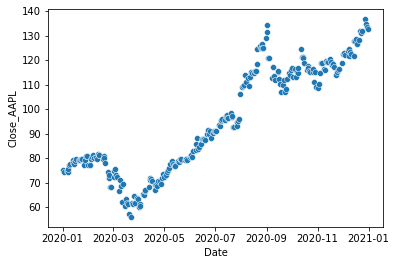

In [31]:
#Basic Scatter Plot with Ticker 1
sns.scatterplot(x = 'Date', y = 'Close_{}'.format(ticker1), data = spmerge1)


<AxesSubplot:xlabel='Date', ylabel='Close_AAPL'>

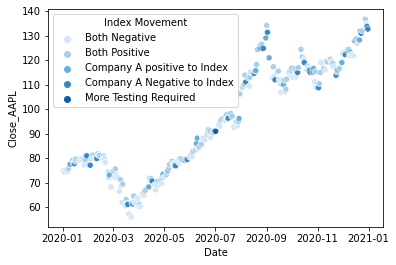

In [32]:
#Scatter Plot with Ticker 1 coloured based on Index Movement
sns.scatterplot(x = 'Date', y = 'Close_{}'.format(ticker1), data = spmerge1, hue = 'Index Movement', palette = "Blues")

Text(0.5, 1.1, 'Stock Ticker AAPL mapped to market movements')

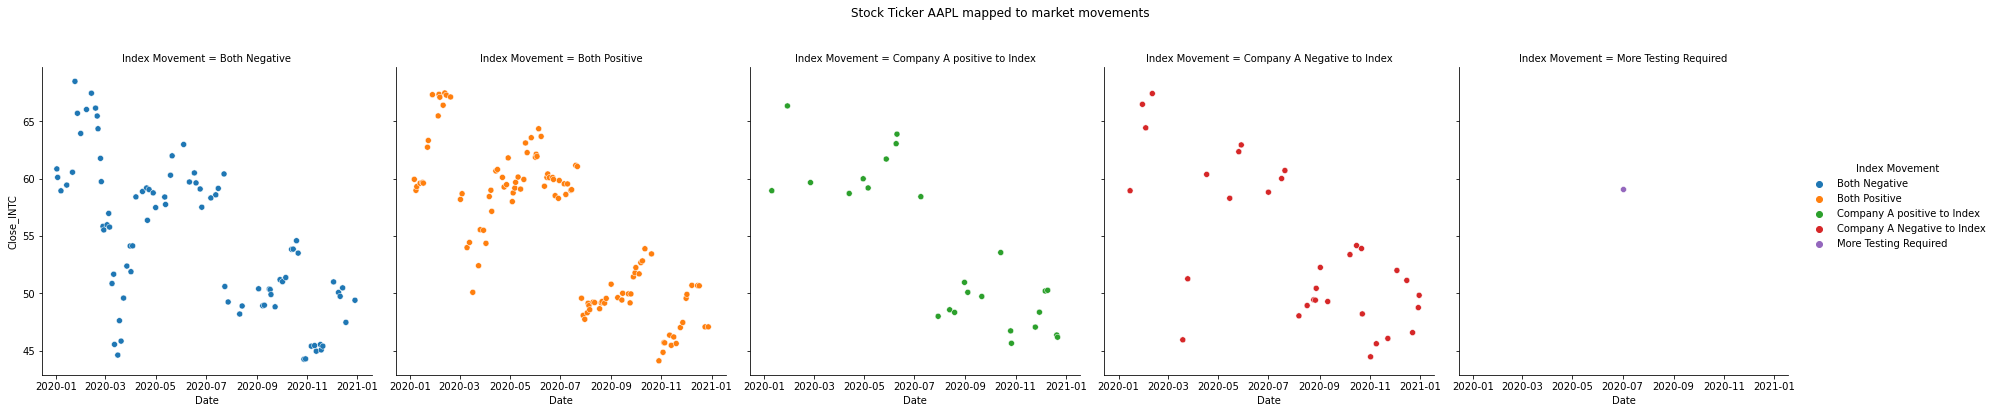

In [33]:
#Relational Plot with Ticker 1 coloured based on Index Movement
g = sns.relplot(x = 'Date', y = 'Close_{}'.format(ticker2), data = spmerge1, kind = 'scatter', col = 'Index Movement', hue = 'Index Movement' )
g.fig.suptitle("Stock Ticker {} mapped to market movements".format(ticker1), y =1.1)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Both Negative'),
  Text(1, 0, 'Both Positive'),
  Text(2, 0, 'Company A positive to Index'),
  Text(3, 0, 'Company A Negative to Index'),
  Text(4, 0, 'More Testing Required')])

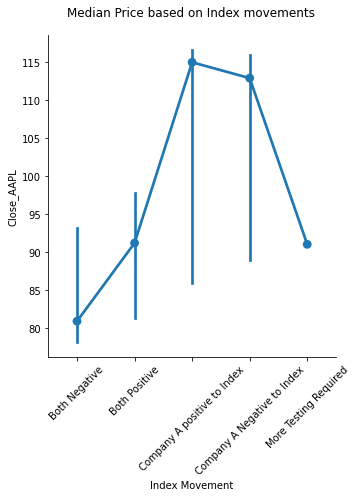

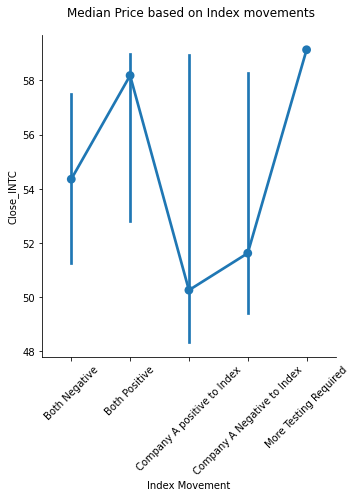

In [34]:
#Relational Plot with Ticker 1 based on Index Movement and Median Price
#Median is calculated using Numpy
g = sns.catplot(x  = 'Index Movement', y  = 'Close_{}'.format(ticker1), data = spmerge1, kind = 'point', estimator=np.median)
g.fig.suptitle("Median Price based on Index movements", y=1.05)
plt.xticks(rotation = 45)
h = sns.catplot(x  = 'Index Movement', y  = 'Close_{}'.format(ticker2), data = spmerge1, kind = 'point', estimator=np.median)
h.fig.suptitle("Median Price based on Index movements", y=1.05)
plt.xticks(rotation = 45)

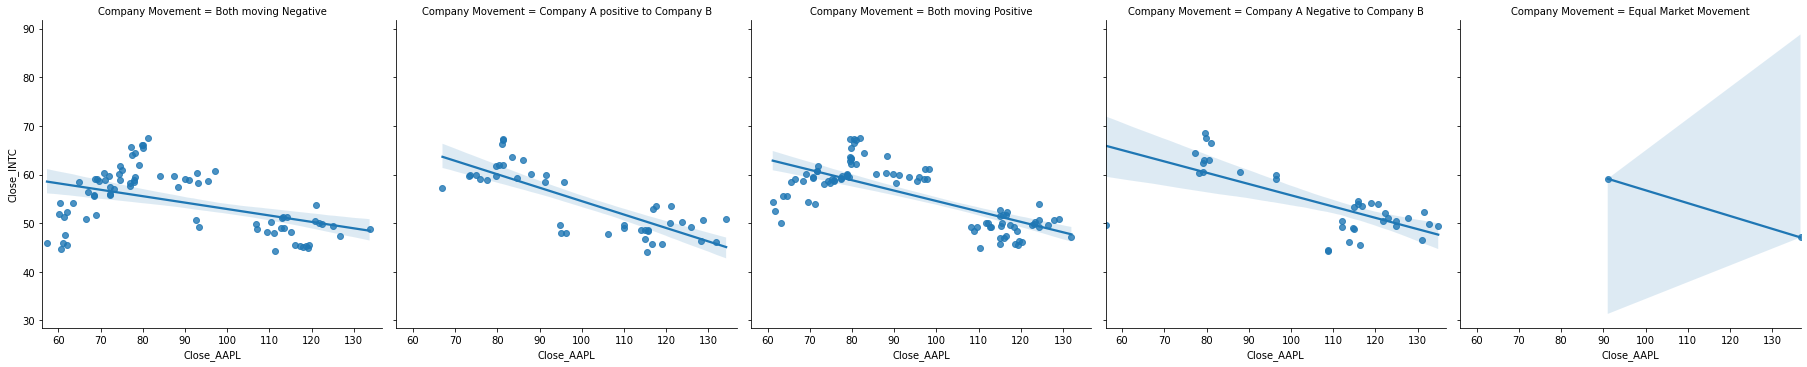

In [35]:
g = sns.lmplot(x= 'Close_{}'.format(ticker1), y = 'Close_{}'.format(ticker2), data = spmerge1, col = 'Company Movement', fit_reg = True)

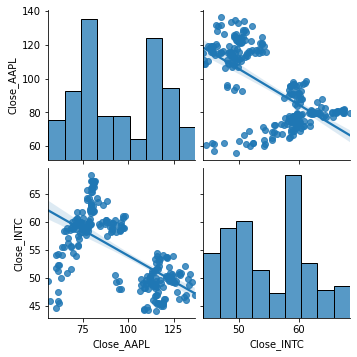

In [36]:
g = sns.pairplot(spmerge1, vars = ['Close_{}'.format(ticker1), 'Close_{}'.format(ticker2)], kind = 'reg', diag_kind = 'hist')